### Task1: Load and prepare dataset (heart disease dataset)

In [2]:
!pip install kagglehub

In [14]:
!pip install scikit-learn


  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 670.4 kB/s eta 0:00:16
   -- ------------------------------------- 0.8/11.1 MB 882.6 kB/s eta 0:00:12
   --- ------------------------------------ 1.0/11.1 MB 1.1 MB/s eta 0:00:09
   ------ --------------------------------- 1.8/11.1 MB 1.7 MB/s 

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alexteboul/heart-disease-health-indicators-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.66M/2.66M [00:05<00:00, 502kB/s]

Extracting files...
Path to dataset files: C:\Users\HP\.cache\kagglehub\datasets\alexteboul\heart-disease-health-indicators-dataset\versions\3


In [298]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
df=pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [352]:
data={}
# binary features of HighBP, HighChol and Stroke are chosen
data['data']=df
# binary label respresenting heart disease is chose
data['label']=df[['HeartDiseaseorAttack']]

In [353]:
## scale age
scaler=StandardScaler()
data['data']['Age'] = scaler.fit_transform(data['data'][['Age']])


In [354]:
print(data['data'][:5])
print(data['label'][:5])

   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex       Age  Educatio

In [355]:
X_train,X_test,y_train,y_test=train_test_split(data['data'],data['label'],test_size=0.10,shuffle=True)
print(f"training examples: {len(X_train)}")
print(f"test examples: {len(X_test)}")

training examples: 228312
test examples: 25368


In [356]:
train_df=pd.concat([X_train,y_train],axis=1)
test_df=pd.concat([X_test,y_test],axis=1)

In [357]:
train_df[:5]

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,HeartDiseaseorAttack
176010,0.0,0.0,0.0,1.0,29.0,1.0,0.0,2.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.971733,5.0,6.0,0.0
115805,0.0,0.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,0.0,5.0,5.0,28.0,1.0,0.0,0.644317,6.0,8.0,0.0
138384,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,-0.337933,6.0,6.0,0.0
25132,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,0.0,0.0,0.0,-1.320182,3.0,4.0,0.0
54626,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,1.0,-0.010516,4.0,8.0,0.0


In [358]:
test_df[:5]

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,HeartDiseaseorAttack
104485,0.0,0.0,0.0,0.0,24.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,3.0,3.0,0.0,0.0,-1.320182,6.0,8.0,0.0
191867,0.0,1.0,0.0,1.0,24.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,1.0,0.316900,4.0,7.0,0.0
104054,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,15.0,0.0,0.0,0.0,-1.647599,6.0,7.0,0.0
227475,0.0,1.0,1.0,1.0,38.0,1.0,0.0,2.0,1.0,1.0,...,0.0,4.0,0.0,0.0,0.0,1.0,0.644317,5.0,7.0,0.0
180708,0.0,1.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,-0.010516,4.0,6.0,0.0


In [359]:
train_df.to_csv('train.csv')
test_df.to_csv('test.csv')

In [360]:
## convert dataframes to numpy array
X_train=train_df.iloc[:,[0,1,2]].to_numpy()
y_train=train_df.iloc[:,3].to_numpy()
X_test=test_df.iloc[:,[0,1,2]].to_numpy()
y_test=test_df.iloc[:,3].to_numpy()

tr

In [361]:
print(type(X_train))
print(X_train.shape)

<class 'numpy.ndarray'>
(228312, 3)


In [362]:
print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
(228312,)


### Task 2: Sigmoid Activation

In [363]:
def sigmoid(z):
    ''' 
    args:
     z - scalar or numpy array (m,) 

    returns:
     sigmoid - scalar or numpy array (m,)
    '''
    z = np.clip(z, -500, 500)  # Prevent overflow
    return 1/(1 + np.exp(-z))

    

In [364]:
arr=np.arange(5)
print(sigmoid(arr))

[0.5        0.73105858 0.88079708 0.95257413 0.98201379]


### Task 3: Cost Function

In [365]:
def cost_function(X,y,W):
    ''' 
    args:
    
    - X all examples + bias term of shape (m,1+n)
    - y target labels (m,1)
    - W weight vector of shape (1+n,1)
    
    returns:
    - loss (scalar)
    '''

    # Ensure W is a column vector
    if W.shape[1] != 1:
        W = W.reshape(-1, 1)
        
    z=X@W
    f_x=sigmoid(z) # shape = (m,)

    # Prevent log(0) errors
    epsilon = 1e-9  
    f_x = np.clip(f_x, epsilon, 1 - epsilon)  

    cost=-y*np.log(f_x)-(1-y)*np.log(1-f_x)
    cost=np.mean(cost)
    return cost



In [366]:
X_test.shape

(25368, 3)

In [367]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
train_df[:5]


,Unnamed: 0,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,HeartDiseaseorAttack.1
0,176010,0.0,0.0,0.0,1.0,29.0,1.0,0.0,2.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.971733,5.0,6.0,0.0
1,115805,0.0,0.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,...,0.0,5.0,5.0,28.0,1.0,0.0,0.644317,6.0,8.0,0.0
2,138384,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,-0.337933,6.0,6.0,0.0
3,25132,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,0.0,-1.320182,3.0,4.0,0.0
4,54626,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,1.0,-0.010516,4.0,8.0,0.0


In [368]:
test_df[:5]

,Unnamed: 0,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,HeartDiseaseorAttack.1
0,104485,0.0,0.0,0.0,0.0,24.0,1.0,0.0,0.0,1.0,...,0.0,1.0,3.0,3.0,0.0,0.0,-1.320182,6.0,8.0,0.0
1,191867,0.0,1.0,0.0,1.0,24.0,1.0,0.0,0.0,1.0,...,1.0,3.0,0.0,0.0,0.0,1.0,0.316900,4.0,7.0,0.0
2,104054,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,...,0.0,1.0,15.0,0.0,0.0,0.0,-1.647599,6.0,7.0,0.0
3,227475,0.0,1.0,1.0,1.0,38.0,1.0,0.0,2.0,1.0,...,0.0,4.0,0.0,0.0,0.0,1.0,0.644317,5.0,7.0,0.0
4,180708,0.0,1.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,-0.010516,4.0,6.0,0.0


In [369]:
X_train=train_df.iloc[:,1:-1]
X_train.iloc[[0]]

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,1.0,29.0,1.0,0.0,2.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.971733,5.0,6.0


In [370]:

## convert dataframes to numpy array
X_train=train_df.iloc[:,1:-1].to_numpy()
y_train=train_df.iloc[:,-1].to_numpy()
X_test=test_df.iloc[:,1:-1].to_numpy()
y_test=test_df.iloc[:,-1].to_numpy()

# concatenate bias term in X_train and X_test
ones=np.ones((X_train.shape[0],1)) # col of ones
X_train=np.hstack((ones,X_train))

ones=np.ones((X_test.shape[0],1))
X_test=np.hstack((ones,X_test))

# initialize weights
weights=np.random.randn(X_train.shape[1])
weights=weights.reshape(-1,1)
print(weights.shape)
print(X_test.shape)
print(X_train.shape)

y_test=y_test.reshape((-1,1))
y_train=y_train.reshape((-1,1))
print(y_test.shape)
print(y_train.shape)

(23, 1)
(25368, 23)
(228312, 23)
(25368, 1)
(228312, 1)


In [371]:
weights

array([[-0.29577909],
       [ 2.04897446],
       [ 1.5893242 ],
       [ 0.17835464],
       [ 1.24099514],
       [ 1.04253668],
       [-0.404312  ],
       [ 1.44954863],
       [-1.1737412 ],
       [-0.95787052],
       [ 1.35520511],
       [-0.00219749],
       [-2.14491493],
       [ 1.06379478],
       [-0.49016373],
       [ 0.82506193],
       [ 0.43246025],
       [-0.82500144],
       [ 0.21639481],
       [-0.44111724],
       [ 1.04323436],
       [-0.74245215],
       [ 1.23463265]])

In [372]:
cost_function(X_train,y_train,weights)

18.430924039288303

### Task 4: Gradient Descent

In [373]:
def compute_gradient(X,y,W):
    '''
    Calculates the gradient of cost wrt to each weight element

    Args:
    - X training examples (m,n+1)
    - y lables (m,1)
    - W (n+1,1)

    returns:
    - dj_dw shape (n+1,1) 
    '''
    m=X.shape[0]
    z=X@W
    f_x=sigmoid(z) # (m,1)
    loss=f_x-y
    dj_dw=(loss.T @ X)*(1/m)
    return dj_dw.T


def gradient_descent(X,y,W,alpha,num_iters):
    for i in range(num_iters):
        dj_dw=compute_gradient(X,y,W)
        W=W-alpha*dj_dw

        if i %10==0:
            print(f"cost at {i+1} iter: {cost_function(X,y,W)}")
    return W

In [381]:
weights=gradient_descent(X_train,y_train,weights,0.01,1000)

cost at 1 iter: 0.05601737184405987
cost at 11 iter: 0.028455134948220294
cost at 21 iter: 0.028126264002194045
cost at 31 iter: 0.02805803495284827
cost at 41 iter: 0.02800225322008117
cost at 51 iter: 0.02795223560793333
cost at 61 iter: 0.027906205512389176
cost at 71 iter: 0.027863037049547883
cost at 81 iter: 0.02782197561038017
cost at 91 iter: 0.027782504809890904
cost at 101 iter: 0.027744263813047874
cost at 111 iter: 0.027706995034950672
cost at 121 iter: 0.027670510678055774
cost at 131 iter: 0.027634671047201475
cost at 141 iter: 0.027599370290818496
cost at 151 iter: 0.02756452686937316
cost at 161 iter: 0.027530077066381706
cost at 171 iter: 0.027495970483012055
cost at 181 iter: 0.027462166845191486
cost at 191 iter: 0.027428633693902617
cost at 201 iter: 0.027395344680918476
cost at 211 iter: 0.02736227828790154
cost at 221 iter: 0.027329416847672858
cost at 231 iter: 0.02729674578557642
cost at 241 iter: 0.02726425302429257
cost at 251 iter: 0.02723192851221248
cost at

In [382]:
cost_function(X_train,y_train,weights)

0.025125685222160663

In [383]:
cost_function(X_test,y_test,weights)

0.02609156289493491

In [384]:
X_train.shape

(228312, 23)

In [385]:
X_test.shape

(25368, 23)

In [388]:
def predict(X, W):
    z = X @ W
    y_pred = sigmoid(z)
    return (y_pred >= 0.5).astype(int)  # Convert to 0 or 1


from sklearn.metrics import accuracy_score,confusion_matrix

pred=predict(X_train,weights)
acc=accuracy_score(y_train,pred)
print(acc)

conf_mat=confusion_matrix(pred,y_train)
print(conf_mat)


0.9968289008024107
[[206733    614]
 [   110  20855]]


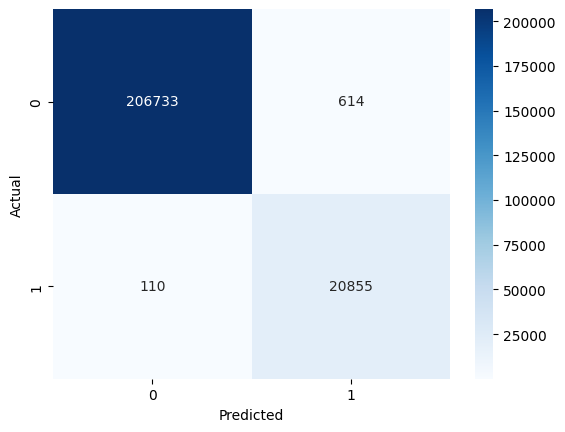

In [389]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
